# Projet Machine learning

Aujourd'hui, en formule 1 comme ailleurs, les données sont des éléments indispensables pour le développement. En formule 1, une voiture peut avoir jusqu'à 120 capteurs en tous genre et générer 3 Go de données chaque seconde. Ces multitudes de données permettent aux écuries de plus facilement s'améliorer. A travers différents graphes, nous allons les enjeu des données en formule 1.

<br>
Nous allons pour cela prendre l'exemple de l'écurie "Renault F1".

## Import des librairies

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

import scipy
import time
import csv

## Dataset import

Pour cette étude, nous allons utiliser des données de deux sites. Le premier étant un ensemble de données sur les saison de formule 1 entre 2009 et 2016. Et le deuxième étant plus axé sur la saison 2011. Dans cette dernière base de données, on utilisera les données d'essai libre (données non présente dans la première base de données)

Base CSV :
https://ergast.com/mrd/

In [127]:
## encoding UTF-8 is not real UTF-8
circuits = pd.read_csv('data/F1_data_2009-2016/circuits.csv', encoding = "ISO-8859-1", engine='python')
constructorResults = pd.read_csv('data/F1_data_2009-2016/constructorResults.csv', encoding = "ISO-8859-1", engine='python') 
constructors = pd.read_csv('data/F1_data_2009-2016/constructors.csv', encoding = "ISO-8859-1", engine='python') 
constructorStandings = pd.read_csv('data/F1_data_2009-2016/constructorStandings.csv', encoding = "ISO-8859-1", engine='python') 
drivers = pd.read_csv('data/F1_data_2009-2016/drivers.csv', encoding = "ISO-8859-1", engine='python') 
driverStandings = pd.read_csv('data/F1_data_2009-2016/driverStandings.csv', encoding = "ISO-8859-1", engine='python')
lapTimes = pd.read_csv('data/F1_data_2009-2016/lapTimes.csv', encoding = "ISO-8859-1", engine='python') 
pitStops = pd.read_csv('data/F1_data_2009-2016/pitStops.csv', encoding = "ISO-8859-1", engine='python') 
qualifying = pd.read_csv('data/F1_data_2009-2016/qualifying.csv')
races = pd.read_csv('data/F1_data_2009-2016/races.csv') 
results = pd.read_csv('data/F1_data_2009-2016/results.csv', encoding = "ISO-8859-1", engine='python')
seasons = pd.read_csv('data/F1_data_2009-2016/seasons.csv', encoding = "ISO-8859-1", engine='python') 
status = pd.read_csv('data/F1_data_2009-2016/status.csv', encoding = "ISO-8859-1", engine='python')

In [128]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÌ_,Spain,41.57000,2.26111,NaN,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN,http://en.wikipedia.org/wiki/Istanbul_Park


In [129]:
constructorResults.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN


In [130]:
constructors.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


In [131]:
constructorStandings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Unnamed: 7
0,1,18,1,14.0,1,1,1,NaN
1,2,18,2,8.0,3,3,0,NaN
2,3,18,3,9.0,2,2,0,NaN
3,4,18,4,5.0,4,4,0,NaN
4,5,18,5,2.0,5,5,0,NaN


In [132]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [133]:
driverStandings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [134]:
lapTimes.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [135]:
pitStops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [136]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [137]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [138]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [139]:
seasons.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [140]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


Base CSV : 
http://www.f1datajunkie.com/p/data.html

In [141]:
## Grand prix de Monaco essai libre
monaco_p1 = pd.read_csv('data/6_Monaco_data/p1.csv',sep=';')
monaco_p2 = pd.read_csv('data/6_Monaco_data/p2.csv',sep=';')
monaco_p3 = pd.read_csv('data/6_Monaco_data/p3.csv',sep=';')

## Grand prix de Monaco Qualification
monaco_qualify = pd.read_csv('data/6_Monaco_data/qualify.csv',sep=';')


## Grand prix du Canada essai libre
canada_p1 = pd.read_csv('data/7_Canada_data/p1.csv',sep=';')
canada_p2 = pd.read_csv('data/7_Canada_data/p2.csv',sep=';')
canada_p3 = pd.read_csv('data/7_Canada_data/p3.csv',sep=';')

## Grand prix du Canada Qualification
canada_qualify = pd.read_csv('data/7_Canada_data/qualify.csv',sep=';')


## Grand prix d'Europe essai libre
europa_p1 = pd.read_csv('data/8_Europa_data/p1.csv',sep=';')
europa_p2 = pd.read_csv('data/8_Europa_data/p2.csv',sep=';')
europa_p3 = pd.read_csv('data/8_Europa_data/p3.csv',sep=';')

## Grand prix d'Europe Qualification
europa_qualify = pd.read_csv('data/8_Europa_data/qualify.csv',sep=';')


## Grand prix de Grande bretagne essai libre
great_britain_p1 = pd.read_csv('data/9_Great_britain_data/p1.csv',sep=';')
great_britain_p2 = pd.read_csv('data/9_Great_britain_data/p2.csv',sep=';')
great_britain_p3 = pd.read_csv('data/9_Great_britain_data/p3.csv',sep=';')

## Grand prix de Grande bretagne Qualification
great_britain_qualify = pd.read_csv('data/9_Great_britain_data/qualify.csv',sep=';')


## Grand prix d'Allemagne essai libre
germany_p1 = pd.read_csv('data/10_Germany_data/p1.csv',sep=';')
germany_p2 = pd.read_csv('data/10_Germany_data/p2.csv',sep=';')
germany_p3 = pd.read_csv('data/10_Germany_data/p3.csv',sep=';')

## Grand prix d'Allemagne Qualification
germany_qualify = pd.read_csv('data/10_Germany_data/qualify.csv',sep=';')


## Grand prix d'Hongrie essai libre
hungary_p1 = pd.read_csv('data/11_Hungary_data/p1.csv',sep=';')
hungary_p2 = pd.read_csv('data/11_Hungary_data/p2.csv',sep=';')
hungary_p3 = pd.read_csv('data/11_Hungary_data/p3.csv',sep=';')

## Grand prix d'Hongrie Qualification
hungary_qualify = pd.read_csv('data/11_Hungary_data/qualify.csv',sep=';')


## Grand prix de Belgique essai libre
belgium_p1 = pd.read_csv('data/12_Belgium_data/p1.csv',sep=';')
belgium_p2 = pd.read_csv('data/12_Belgium_data/p2.csv',sep=';')
belgium_p3 = pd.read_csv('data/12_Belgium_data/p3.csv',sep=';')

## Grand prix de Belgique Qualification
belgium_qualify = pd.read_csv('data/12_Belgium_data/qualify.csv',sep=';')

## Grand prix de Belgique essai libre
italia_p1 = pd.read_csv('data/13_Italia_data/p1.csv',sep=';')
italia_p2 = pd.read_csv('data/13_Italia_data/p2.csv',sep=';')
italia_p3 = pd.read_csv('data/13_Italia_data/p3.csv',sep=';')

## Grand prix de Belgique Qualification
italia_qualify = pd.read_csv('data/13_Italia_data/qualify.csv',sep=';')

## Traitement des datasets

In [142]:
## Grand prix de Monaco
monaco_p1["Time"] =  monaco_p1["Time"].str.replace(',','.').astype(float)
monaco_p2["Time"] =  monaco_p2["Time"].str.replace(',','.').astype(float)
monaco_p3["Time"] =  monaco_p3["Time"].str.replace(',','.').astype(float)
monaco_qualify["Time"] =  monaco_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix du Canada
canada_p1["Time"] =  canada_p1["Time"].str.replace(',','.').astype(float)
canada_p2["Time"] =  canada_p2["Time"].str.replace(',','.').astype(float)
canada_p3["Time"] =  canada_p3["Time"].str.replace(',','.').astype(float)
canada_qualify["Time"] =  canada_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix d'Europe
europa_p1["Time"] =  europa_p1["Time"].str.replace(',','.').astype(float)
europa_p2["Time"] =  europa_p2["Time"].str.replace(',','.').astype(float)
europa_p3["Time"] =  europa_p3["Time"].str.replace(',','.').astype(float)
europa_qualify["Time"] =  europa_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix de Grande bretagne
great_britain_p1["Time"] =  great_britain_p1["Time"].str.replace(',','.').astype(float)
great_britain_p2["Time"] =  great_britain_p2["Time"].str.replace(',','.').astype(float)
great_britain_p3["Time"] =  great_britain_p3["Time"].str.replace(',','.').astype(float)
great_britain_qualify["Time"] =  great_britain_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix d'Allemagne
germany_p1["Time"] =  germany_p1["Time"].str.replace(',','.').astype(float)
germany_p2["Time"] =  germany_p2["Time"].str.replace(',','.').astype(float)
germany_p3["Time"] =  germany_p3["Time"].str.replace(',','.').astype(float)
germany_qualify["Time"] =  germany_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix d'Hongrie
hungary_p1["Time"] =  hungary_p1["Time"].str.replace(',','.').astype(float)
hungary_p2["Time"] =  hungary_p2["Time"].str.replace(',','.').astype(float)
hungary_p3["Time"] =  hungary_p3["Time"].str.replace(',','.').astype(float)
hungary_qualify["Time"] =  hungary_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix de Belgique
belgium_p1["Time"] =  belgium_p1["Time"].str.replace(',','.').astype(float)
belgium_p2["Time"] =  belgium_p2["Time"].str.replace(',','.').astype(float)
belgium_p3["Time"] =  belgium_p3["Time"].str.replace(',','.').astype(float)
belgium_qualify["Time"] =  belgium_qualify["Time"].str.replace(',','.').astype(float)

## Grand prix de Italie
italia_p1["Time"] =  italia_p1["Time"].str.replace(',','.').astype(float)
italia_p2["Time"] =  italia_p2["Time"].str.replace(',','.').astype(float)
italia_p3["Time"] =  italia_p3["Time"].str.replace(',','.').astype(float)
italia_qualify["Time"] =  italia_qualify["Time"].str.replace(',','.').astype(float)

In [143]:
italia_p1.head()

,Name,DriverNum,Lap,Time,Elapsed,Stint,Fuel Corrected Laptime,Stint Length,Lap in stint
0,T. GLOCK,24,2,133.040,"1068,993",1,"133,04",1,1
1,T. GLOCK,24,5,130.488,"4756,279",3,"130,208",6,1
2,T. GLOCK,24,6,97.158,"4853,437",3,"96,934",6,2
3,T. GLOCK,24,7,91.502,"4944,939",3,"91,334",6,3
4,T. GLOCK,24,8,91.052,"5035,991",3,"90,94",6,4


In [144]:
italia_qualify.head()

,Name,DriverNum,Lap,Time,Elapsed,Stint,Fuel Corrected Laptime,Stint Length,Lap in stint
0,T. GLOCK,24,1,88.466,"109,466",1,"88,354",3,1
1,T. GLOCK,24,2,87.591,"197,057",1,"87,535",3,2
2,T. GLOCK,24,3,101.804,"298,861",1,"101,804",3,3
3,T. GLOCK,24,5,89.027,"818,448",2,"88,859",4,1
4,T. GLOCK,24,6,87.718,"906,166",2,"87,606",4,2


## Fonction

In [145]:
## Retourne le temps le plus rapide effectué pendant les essais libres pour un pilote

## Prend en paramètre 3 tableau avec une colonne Time et Name et un String qui est le nom du pilote
def minimumPractice(p1,p2,p3,name):
    query = 'Name == "' + name + '"'
    minimum = 99999
    
    tmp = p1[['Time','Name']].query(query)
    if (np.isnan(tmp['Time'].min()) != True) :
        minimum = tmp['Time'].min()

    tmp = p2[['Time','Name']].query(query)
    if (np.isnan(tmp['Time'].min()) != True) and (tmp['Time'].min() < minimum) :
        minimum = tmp['Time'].min()

    tmp = p3[['Time','Name']].query(query)
    if (np.isnan(tmp['Time'].min()) != True) and (tmp['Time'].min() < minimum) :
        minimum = tmp['Time'].min()
    
    if minimum == 99999:
        minimum = float("nan")
    return minimum   

In [146]:
## Retourne le temps le plus rapide effectué pendant les essais libres et son meilleur temps au qualification
## pour un pilote 

## Prend en paramètre 4 tableau avec une colonne Time et Name et un String qui est le nom du pilote
def minimumPracticeAndQualify(p1,p2,p3,qualify,name):
    minimum_practice = minimumPractice(p1,p2,p3,name)
        
    query = 'Name == "' + name + '"'
    tmp = qualify[['Time','Name']].query(query)
    minimum_qualify = tmp['Time'].min()
    
    try:
        tmp = qualify.query(query + " and Time == " + str(minimum_qualify))
        Lap = tmp['Lap'].min()
        Stint = tmp['Stint'].min()
        DriverNum = tmp['DriverNum'].min()
        minimum = [minimum_qualify,minimum_practice,name,DriverNum,Lap,Stint]
        return minimum
    except Exception:
        pass
 
    minimum = [minimum_qualify,minimum_practice,name,np.nan,np.nan,np.nan]
    return minimum

In [147]:
## Retourne les temps les plus rapide effectuées pendant les essais libres et son meilleur temps au qualification 
## pour chaque grand prix pour un pilote 

## Prend en paramètre un nom de pilote
def minimumPracticeAndQualifyForAllRace(name):
    monaco = minimumPracticeAndQualify(monaco_p1,monaco_p2,monaco_p3,monaco_qualify,name) + ['monaco']
    canada = minimumPracticeAndQualify(canada_p1,canada_p2,canada_p3,canada_qualify,name) + ['canada']
    europa = minimumPracticeAndQualify(europa_p1,europa_p2,europa_p3,europa_qualify,name) + ['europa']
    great_britain = minimumPracticeAndQualify(great_britain_p1,great_britain_p2,great_britain_p3,great_britain_qualify,name) + ['great_britain']
    germany = minimumPracticeAndQualify(germany_p1,germany_p2,germany_p3,germany_qualify,name) + ['germany']
    hungary = minimumPracticeAndQualify(hungary_p1,hungary_p2,hungary_p3,hungary_qualify,name) + ['hungary']
    belgium = minimumPracticeAndQualify(belgium_p1,belgium_p2,belgium_p3,belgium_qualify,name) + ['belgium']
    
    total = [monaco,canada,europa,great_britain,germany,hungary,belgium]
    return total
    

## I. Etats de l'art

In [148]:
races_2011 = races.query('year == 2011')

In [149]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [150]:
constructors.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


In [151]:
races_2011.head()

,raceId,year,round,circuitId,name,date,time,url
839,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
840,842,2011,2,2,Malaysian Grand Prix,2011-04-10,08:00:00,http://en.wikipedia.org/wiki/2011_Malaysian_Gr...
841,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...
842,844,2011,4,5,Turkish Grand Prix,2011-05-08,12:00:00,http://en.wikipedia.org/wiki/2011_Turkish_Gran...
843,845,2011,5,4,Spanish Grand Prix,2011-05-22,12:00:00,http://en.wikipedia.org/wiki/2011_Spanish_Gran...


In [152]:
data = pd.merge(races_2011,results,on = "raceId",how='inner')
data = pd.merge(data,constructors[["constructorId","name"]],on = "constructorId",how='inner')
data = pd.merge(data,drivers[["driverId","driverRef"]],on = "driverId",how='inner')

In [153]:
data = data.query("name_y == 'Renault'")
data.head()

,raceId,year,round,circuitId,name_x,date,time_x,url,resultId,driverId,...,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,name_y,driverRef
76,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20781,808,...,58,30.56,5400819.0,55.0,7.0,01:30.1,211.969,1,Renault,petrov
77,842,2011,2,2,Malaysian Grand Prix,2011-04-10,08:00:00,http://en.wikipedia.org/wiki/2011_Malaysian_Gr...,20817,808,...,52,NaN,NaN,49.0,3.0,01:41.1,197.466,3,Renault,petrov
78,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,20833,808,...,56,57.404,5875630.0,NaN,0.0,NaN,NaN,1,Renault,petrov
79,844,2011,4,5,Turkish Grand Prix,2011-05-08,12:00:00,http://en.wikipedia.org/wiki/2011_Turkish_Gran...,20856,808,...,58,+1:08.168,5485726.0,48.0,8.0,01:30.6,212.063,1,Renault,petrov
80,845,2011,5,4,Spanish Grand Prix,2011-05-22,12:00:00,http://en.wikipedia.org/wiki/2011_Spanish_Gran...,20883,808,...,65,NaN,NaN,35.0,17.0,01:29.6,187.047,11,Renault,petrov


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 76 to 113
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           38 non-null     int64  
 1   year             38 non-null     int64  
 2   round            38 non-null     int64  
 3   circuitId        38 non-null     int64  
 4   name_x           38 non-null     object 
 5   date             38 non-null     object 
 6   time_x           38 non-null     object 
 7   url              38 non-null     object 
 8   resultId         38 non-null     int64  
 9   driverId         38 non-null     int64  
 10  constructorId    38 non-null     int64  
 11  number           38 non-null     float64
 12  grid             38 non-null     int64  
 13  position         32 non-null     float64
 14  positionText     38 non-null     object 
 15  positionOrder    38 non-null     int64  
 16  points           38 non-null     float64
 17  laps            

### Nombre de grand prix disputé

In [155]:
data_1 = data.groupby(['driverRef'])["raceId"].count()

In [156]:
data_1

driverRef
bruno_senna     8
heidfeld       11
petrov         19
Name: raceId, dtype: int64

### Meilleur classement

In [157]:
data[["driverRef","name_x","position"]].head()

,driverRef,name_x,position
76,petrov,Australian Grand Prix,3.0
77,petrov,Malaysian Grand Prix,17.0
78,petrov,Chinese Grand Prix,9.0
79,petrov,Turkish Grand Prix,8.0
80,petrov,Spanish Grand Prix,11.0


In [158]:
data_2 = data.groupby(['driverRef'])["position"]

In [159]:
data_2.min()

driverRef
bruno_senna    9.0
heidfeld       3.0
petrov         3.0
Name: position, dtype: float64

### Nombre de podium

In [160]:
data_3 = data.query("position < 4").groupby(['driverRef'])["position"]

In [161]:
data_3.count()

driverRef
heidfeld    1
petrov      1
Name: position, dtype: int64

### Classement de l'équipe Renault

In [162]:
races_2011["raceId"].max()

859

In [163]:
constructorStandings_2011 = constructorStandings.query("raceId == 859")
constructorStandings_2011 = pd.merge(constructorStandings_2011,constructors,on = "constructorId",how='left')

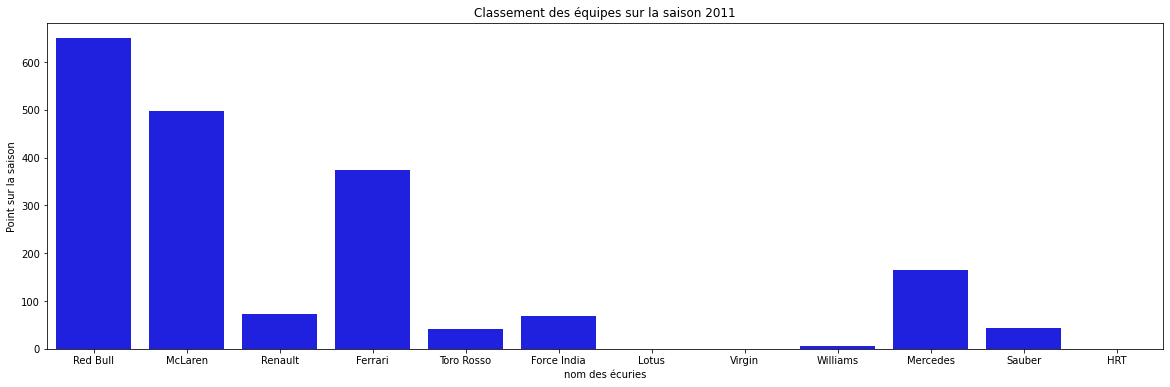

In [164]:
sns.barplot(x="name", y="points", data=constructorStandings_2011 ,label="Total", color="b")
fig = mp.pyplot.gcf()
plt.title('Classement des équipes sur la saison 2011')
plt.xlabel('nom des écuries') 
plt.ylabel('Point sur la saison') 
fig.set_size_inches(20,6)

### Classement des pilotes Renault

In [165]:
driverStandings_2011 = driverStandings.query("raceId == 859")
driverStandings_2011 = pd.merge(driverStandings_2011,drivers,on = "driverId",how='left')

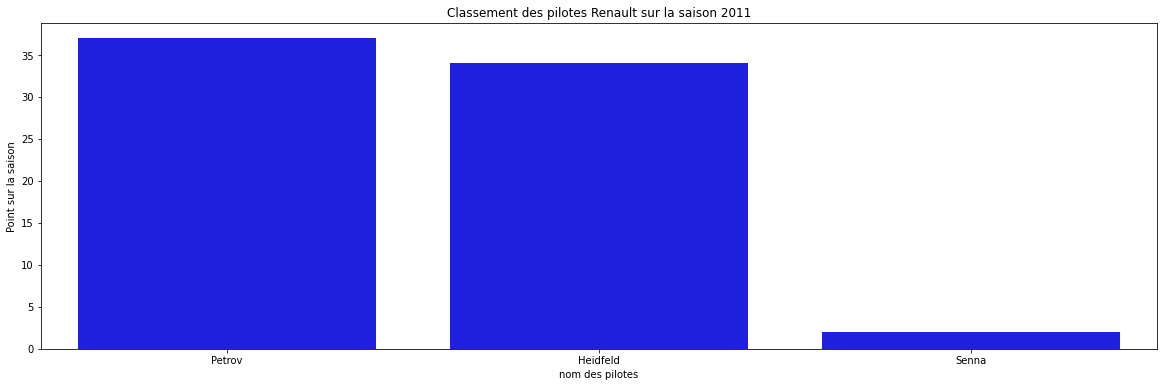

In [166]:
sns.barplot(x="surname", y="points", data=driverStandings_2011.query("surname == 'Petrov' or surname == 'Senna' or surname == 'Heidfeld'") ,label="Total", color="b")
fig = mp.pyplot.gcf()
plt.title('Classement des pilotes Renault sur la saison 2011')
plt.xlabel('nom des pilotes') 
plt.ylabel('Point sur la saison') 
fig.set_size_inches(20,6)

In [167]:
driverStandings_2011

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,number,code,forename,surname,dob,nationality,url
0,64878,859,20,392.0,1,1,11,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
1,64879,859,1,227.0,5,5,3,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,64880,859,808,37.0,10,10,0,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov
3,64881,859,4,257.0,4,4,1,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,64882,859,17,258.0,3,3,1,webber,NaN,WEB,Mark,Webber,27/08/1976,Australian,http://en.wikipedia.org/wiki/Mark_Webber
5,64883,859,18,270.0,2,2,3,button,22.0,BUT,Jenson,Button,19/01/1980,British,http://en.wikipedia.org/wiki/Jenson_Button
6,64884,859,13,118.0,6,6,0,massa,19.0,MAS,Felipe,Massa,25/04/1981,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
7,64885,859,67,15.0,15,15,0,buemi,NaN,BUE,SÌ©bastien,Buemi,31/10/1988,Swiss,http://en.wikipedia.org/wiki/S%C3%A9bastien_Buemi
8,64886,859,16,42.0,9,9,0,sutil,99.0,SUT,Adrian,Sutil,11/01/1983,German,http://en.wikipedia.org/wiki/Adrian_Sutil
9,64887,859,814,27.0,13,13,0,resta,NaN,DIR,Paul,di Resta,16/04/1986,British,http://en.wikipedia.org/wiki/Paul_di_Resta


### Prediction des qualitifactions pour le grand prix d'Italie

In [168]:
vettel = minimumPracticeAndQualifyForAllRace('S. VETTEL')
webber = minimumPracticeAndQualifyForAllRace('M. WEBBER')
hamilton = minimumPracticeAndQualifyForAllRace('L. HAMILTON')
button = minimumPracticeAndQualifyForAllRace('J. BUTTON')
alonso = minimumPracticeAndQualifyForAllRace('F. ALONSO')
massa = minimumPracticeAndQualifyForAllRace('F. MASSA')
schumacher = minimumPracticeAndQualifyForAllRace('M. SCHUMACHER')
rosberg = minimumPracticeAndQualifyForAllRace('N. ROSBERG')
heidfeld = minimumPracticeAndQualifyForAllRace('N. HEIDFELD')
senna = minimumPracticeAndQualifyForAllRace('B. SENNA')
petrov = minimumPracticeAndQualifyForAllRace('V. PETROV')
barrichello = minimumPracticeAndQualifyForAllRace('R. BARRICHELLO')
maldonado = minimumPracticeAndQualifyForAllRace('P. MALDONADO')
sutil = minimumPracticeAndQualifyForAllRace('A. SUTIL')
di_resta = minimumPracticeAndQualifyForAllRace('P. DI RESTA')
kobayashi = minimumPracticeAndQualifyForAllRace('K. KOBAYASHI')
perez = minimumPracticeAndQualifyForAllRace('S. PEREZ')
de_la_rosa = minimumPracticeAndQualifyForAllRace('P. DE LA ROSA')
buemi = minimumPracticeAndQualifyForAllRace('S. BUEMI')
alguersuari = minimumPracticeAndQualifyForAllRace('J. ALGUERSUARI')
kovalainen = minimumPracticeAndQualifyForAllRace('H. KOVALAINEN')
trulli = minimumPracticeAndQualifyForAllRace('J. TRULLI')
chandhok = minimumPracticeAndQualifyForAllRace('K. CHANDHOK')
ricciardo = minimumPracticeAndQualifyForAllRace('D. RICCIARDO')
liuzzi = minimumPracticeAndQualifyForAllRace('V. LIUZZI')
karthikeyan = minimumPracticeAndQualifyForAllRace('N. KARTHIKEYAN')
glock = minimumPracticeAndQualifyForAllRace('T. GLOCK')
ambrosio = minimumPracticeAndQualifyForAllRace("J. D'AMBROSIO")

In [169]:
driver = [vettel,webber,hamilton,button,alonso,massa,schumacher,rosberg,heidfeld,senna,petrov,barrichello]
driver = driver + [maldonado,sutil,di_resta,kobayashi,perez,de_la_rosa,buemi,alguersuari,kovalainen,trulli]
driver = driver + [chandhok,ricciardo,liuzzi,karthikeyan,glock,ambrosio]

In [170]:
with open('data_f1_2011_practice_qualify.csv','w') as data_f1_2011_practice_qualify:
    wr = csv.writer(data_f1_2011_practice_qualify)
    wr.writerow(['qualify','practice','driver','DriverNum','Lap','Stint','track'])
    for i in driver:
        for j in i:
             wr.writerow([j[0],j[1],j[2],j[3],j[4],j[5],j[6]])

In [171]:
data_f1_2011_practice_qualify = pd.read_csv('data_f1_2011_practice_qualify.csv')

In [172]:
data_f1_2011_practice_qualify.head()

,qualify,practice,driver,DriverNum,Lap,Stint,track
0,73.556,75.245,S. VETTEL,1.0,15.0,3.0,monaco
1,73.014,73.381,S. VETTEL,1.0,13.0,3.0,canada
2,96.975,97.258,S. VETTEL,1.0,14.0,3.0,europa
3,90.431,91.401,S. VETTEL,1.0,15.0,4.0,great_britain
4,90.216,90.916,S. VETTEL,1.0,14.0,4.0,germany


Text(0.5, 1.0, 'Heatmap de la matrice de coorélation entre les données de "data_f1_2011_practice_qualify" ')

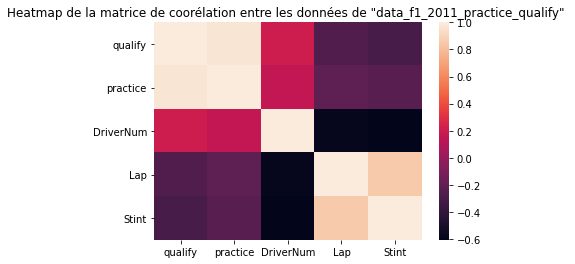

In [173]:
g = sns.heatmap(data_f1_2011_practice_qualify.corr())
fig = mp.pyplot.gcf()
plt.title('Heatmap de la matrice de coorélation entre les données de "data_f1_2011_practice_qualify" ')

Dans cette heatmap de la matrice de coorélation, on remarque une forte corrélation entre les temps des qualifications et les meilleurs temps des essais libres.Il y a aussi une corrélation entre le numéro du tour et la séance de qualification (Stint).

Text(3.674999999999997, 0.5, 'Meilleur temps des essais libre en seconde')

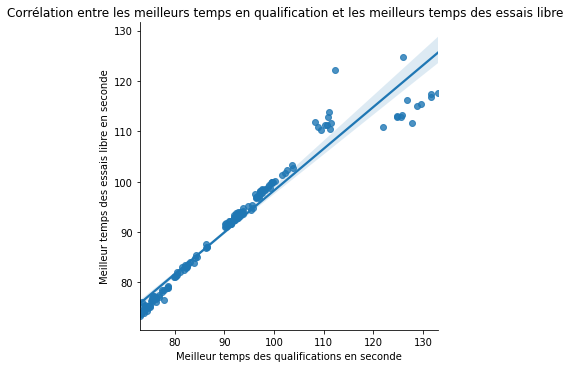

In [195]:
sns.lmplot(x="qualify",y="practice",data = data_f1_2011_practice_qualify)
fig = mp.pyplot.gcf()
plt.title('Corrélation entre les meilleurs temps en qualification et les meilleurs temps des essais libre  ')
plt.xlabel('Meilleur temps des qualifications en seconde') 
plt.ylabel('Meilleur temps des essais libre en seconde') 

On remarque que les meilleurs temps des essais libre et les meilleurs temps de qualifications sont corrélés. Anticiper les temps des qualifications est possibles.  

## II. Les chiffres des pilotes

In [175]:
data = pd.merge(races_2011,lapTimes,on = "raceId",how='left')
data = pd.merge(data,drivers,on = "driverId",how='left')
data.head()

,raceId,year,round,circuitId,name,date,time_x,url_x,driverId,lap,...,time_y,milliseconds,driverRef,number,code,forename,surname,dob,nationality,url_y
0,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,1,...,1:38.109,98109,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
1,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,2,...,1:33.006,93006,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
2,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,3,...,1:32.713,92713,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
3,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,4,...,1:32.803,92803,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
4,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,5,...,1:32.342,92342,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel


In [176]:
data["seconds"] = data["milliseconds"]/1000
data["seconds"].head()

0    98.109
1    93.006
2    92.713
3    92.803
4    92.342
Name: seconds, dtype: float64

### Etude du grand prix de Chine de Petrov

In [177]:
petrov_chine = data.query('name == "Chinese Grand Prix" and driverRef == "petrov"')

In [178]:
petrov_chine.head()

,raceId,year,round,circuitId,name,date,time_x,url_x,driverId,lap,...,milliseconds,driverRef,number,code,forename,surname,dob,nationality,url_y,seconds
2779,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,808,1,...,113553,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov,113.553
2780,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,808,2,...,106671,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov,106.671
2781,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,808,3,...,106131,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov,106.131
2782,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,808,4,...,106442,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov,106.442
2783,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,808,5,...,105834,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov,105.834


Text(0, 0.5, 'Temps en seconds')

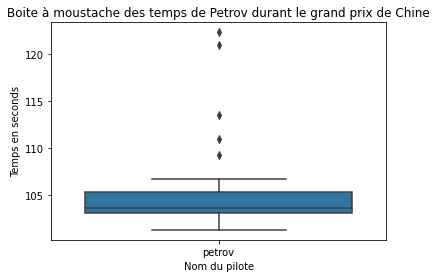

In [180]:
sns.boxplot(x="driverRef", y="seconds", data=petrov_chine)
fig = mp.pyplot.gcf()
plt.title('Boite à moustache des temps de Petrov durant le grand prix de Chine')
plt.xlabel('Nom du pilote') 
plt.ylabel('Temps en seconds') 

Dans cette représentation des temps au tour de Petrov, on remarque les valeurs abérantes.

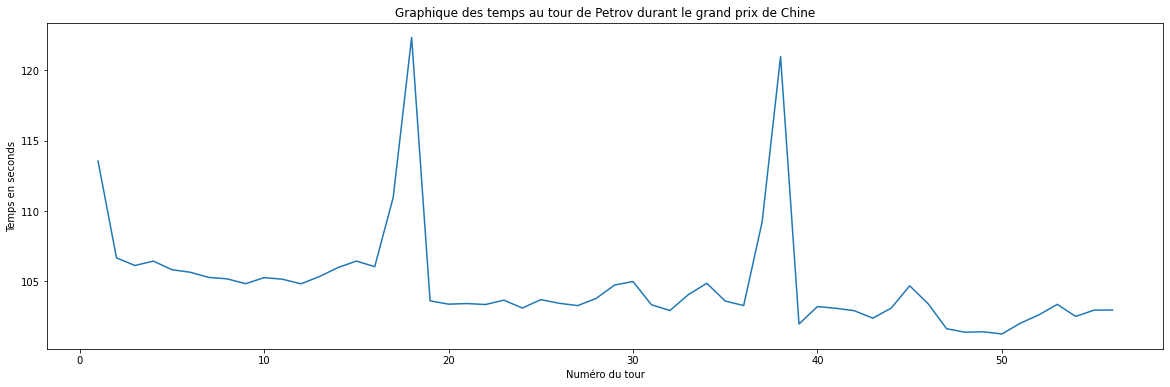

In [182]:
sns.lineplot(data=petrov_chine,x="lap",y="seconds")
fig = mp.pyplot.gcf()
plt.title('Graphique des temps au tour de Petrov durant le grand prix de Chine')
plt.xlabel('Numéro du tour') 
plt.ylabel('Temps en seconds') 
fig.set_size_inches(20,6)

On remarque ici 3 grands piques au tour 1, 17, 18, 37 et 38. Ces piques correspondent aux valeurs abérrantes de la boite à moustache. Elles sont du au départ de la course et au 2 arrets au stands.

In [184]:
petrov_chine.query("seconds > 109")[["lap", "driverRef", "seconds"]]

,lap,driverRef,seconds
2779,1,petrov,113.553
2795,17,petrov,110.970
2796,18,petrov,122.344
2815,37,petrov,109.222
2816,38,petrov,120.987


Text(0, 0.5, 'Temps en seconds')

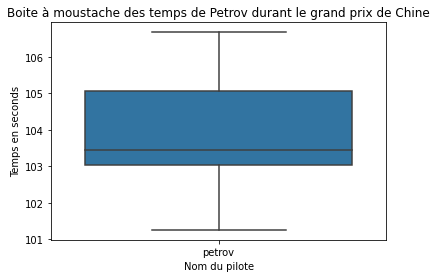

In [196]:
sns.boxplot(x="driverRef", y="seconds", data=petrov_chine.query("seconds < 109"))
fig = mp.pyplot.gcf()
plt.title('Boite à moustache des temps de Petrov durant le grand prix de Chine')
plt.xlabel('Nom du pilote') 
plt.ylabel('Temps en seconds') 

Sur cette boite à moustache que l'on as filtré, on remarque que 50% de ses temps sont compris entre 103 et 105 secondes et la médiane de ces temps est à 103.5 secondes.

In [185]:
ps0 = petrov_chine.query("lap < 17 and lap > 1")["seconds"].mean()
ps1 = petrov_chine.query("lap < 37 and lap > 18")["seconds"].mean()
ps2 = petrov_chine.query("lap > 38")["seconds"].mean()

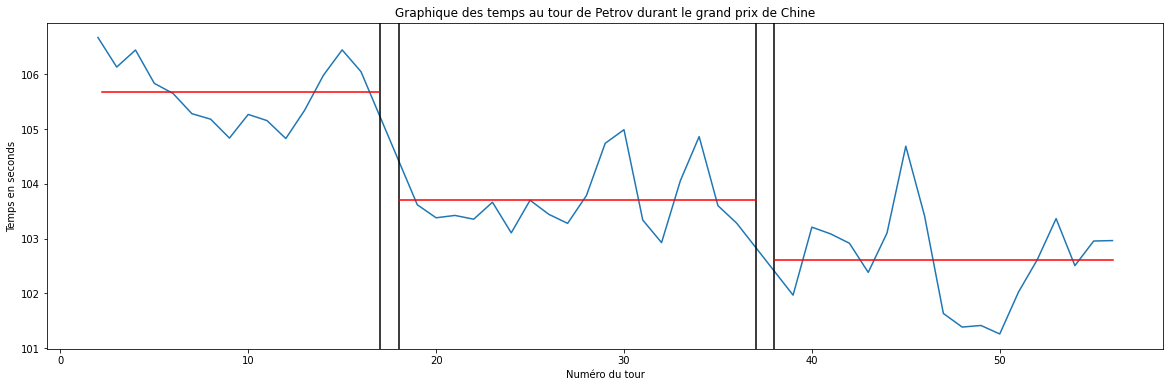

In [189]:
sns.lineplot(data=petrov_chine.query("seconds < 109"),x="lap",y="seconds")
fig = mp.pyplot.gcf()

plt.title('Graphique des temps au tour de Petrov durant le grand prix de Chine')
plt.xlabel('Numéro du tour') 
plt.ylabel('Temps en seconds') 

plt.axvline(17, 0, 1, c='black')
plt.axvline(18, 0, 1, c='black')

plt.axvline(37, 0, 1, c='black')
plt.axvline(38, 0, 1, c='black')

plt.axhline(ps0, 0.049, 0.297, c='red')
plt.axhline(ps1, 0.315, 0.635, c='red')
plt.axhline(ps2, 0.652, 0.955, c='red')

fig.set_size_inches(20,6)

En enlevant les valeurs abérrantes vuent au dessus, on remarque que la moyenne des temps au tour entre les arrêts (ici en rouge) ne cessent de s'amméliorer. Ceci est du à la différence entre le poids d'essence et au niveau de dégradation des pneus (qui sont neuf après un arrêt au stand).
<br><br>
Je précise que lors de la saison 2011, il n'y avait de ravitaillement en essence autorisé.
<br><br>
On remarque néanmoins des pics, par exemple, lors des tour 29 et 33. Elles sont à une bataille entre Petrov et un autre pilote. Ces batailles font perdre du temps au pilote sur le tour.

### Etude des écarts entre Petrov et Heidfeld dans le grand prix de Turquie 

In [190]:
petrov_timelap = data.query('name == "Turkish Grand Prix" and driverRef == "petrov"')
heidfeld_timelap = data.query('name == "Turkish Grand Prix" and driverRef == "heidfeld"')

In [191]:
petrov_timelap["cumtime"] = petrov_timelap["seconds"].cumsum()
heidfeld_timelap["cumtime"] = heidfeld_timelap["seconds"].cumsum()

<ipython-input-191-31095b3108a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petrov_timelap["cumtime"] = petrov_timelap["seconds"].cumsum()
<ipython-input-191-31095b3108a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heidfeld_timelap["cumtime"] = heidfeld_timelap["seconds"].cumsum()


In [192]:
timelap_turkish = pd.merge(heidfeld_timelap[["raceId","name","lap","driverRef","cumtime","seconds"]],petrov_timelap[["driverRef","cumtime","seconds","lap"]],on = "lap")
timelap_turkish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raceId       58 non-null     int64  
 1   name         58 non-null     object 
 2   lap          58 non-null     int64  
 3   driverRef_x  58 non-null     object 
 4   cumtime_x    58 non-null     float64
 5   seconds_x    58 non-null     float64
 6   driverRef_y  58 non-null     object 
 7   cumtime_y    58 non-null     float64
 8   seconds_y    58 non-null     float64
dtypes: float64(4), int64(2), object(3)
memory usage: 4.5+ KB


In [193]:
timelap_turkish["gap_petrov_heidfeld"] = timelap_turkish["cumtime_x"] - timelap_turkish["cumtime_y"]
timelap_turkish["delta_petrov_heidfeld"] = timelap_turkish["seconds_x"] - timelap_turkish["seconds_y"]
timelap_turkish.head()

,raceId,name,lap,driverRef_x,cumtime_x,seconds_x,driverRef_y,cumtime_y,seconds_y,gap_petrov_heidfeld,delta_petrov_heidfeld
0,844,Turkish Grand Prix,1,heidfeld,100.734,100.734,petrov,100.330,100.330,0.404,0.404
1,844,Turkish Grand Prix,2,heidfeld,197.897,97.163,petrov,197.636,97.306,0.261,-0.143
2,844,Turkish Grand Prix,3,heidfeld,294.160,96.263,petrov,293.084,95.448,1.076,0.815
3,844,Turkish Grand Prix,4,heidfeld,389.387,95.227,petrov,387.765,94.681,1.622,0.546
4,844,Turkish Grand Prix,5,heidfeld,484.738,95.351,petrov,482.642,94.877,2.096,0.474


Text(0, 0.5, 'Delta en seconde')

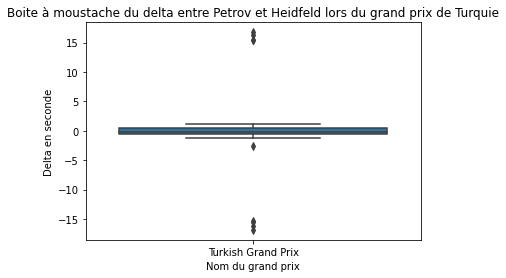

In [194]:
sns.boxplot(x="name", y="delta_petrov_heidfeld", data=timelap_turkish[["name","delta_petrov_heidfeld"]])
plt.title('Boite à moustache du delta entre Petrov et Heidfeld lors du grand prix de Turquie')
plt.xlabel('Nom du grand prix') 
plt.ylabel('Delta en seconde') 

On remarque de nouveau sur cette boite à moustache des valeurs abérantes. Elles sont aussi du au arrêt au stand.

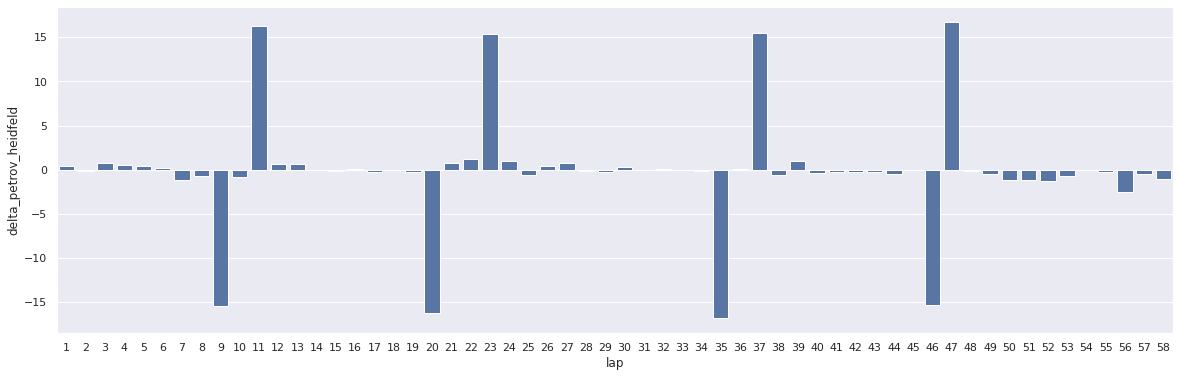

In [501]:
sns.barplot(x="lap", y="delta_petrov_heidfeld", data=timelap_turkish[["delta_petrov_heidfeld","lap"]],label="Total", color="b")
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

Sur ce graphe, on remarque que les valeurs abérantes resortent. Elles correspondent aux ravitallements effectués par les pilotes.

In [502]:
timelap_turkish.query("delta_petrov_heidfeld < -2.5 or delta_petrov_heidfeld > 2.5 ")[["delta_petrov_heidfeld","lap"]]

,delta_petrov_heidfeld,lap
8,-15.475,9
10,16.258,11
19,-16.259,20
22,15.408,23
34,-16.868,35
36,15.491,37
45,-15.341,46
46,16.748,47
55,-2.534,56


<AxesSubplot:xlabel='name', ylabel='delta_petrov_heidfeld'>

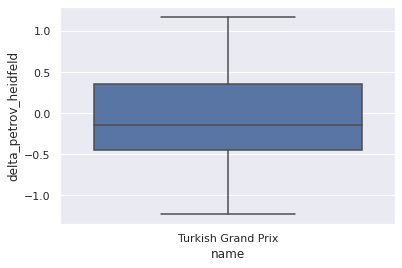

In [503]:
sns.boxplot(x="name", y="delta_petrov_heidfeld", data=timelap_turkish.query("delta_petrov_heidfeld > -2.5 and delta_petrov_heidfeld < 2.5 ")[["name","delta_petrov_heidfeld"]])

Après suppression des valeurs abérantes, on remarque que le delta médian entre les deux pilotes est de 0.2 secondes. 50% des deltas entre ces deux pilotes est entre -0.45 secondes et 0.4 secondes. On en déduit que ces deux pilotes ont éffectués une course semblable. 

In [504]:
delta_turkish = timelap_turkish.query("delta_petrov_heidfeld > -2.5 and delta_petrov_heidfeld < 2.5 ")[["delta_petrov_heidfeld","lap"]]

In [505]:
ps0 = delta_turkish.query("lap < 9")["delta_petrov_heidfeld"].mean()
ps1 = delta_turkish.query("lap > 11 and lap < 20")["delta_petrov_heidfeld"].mean()
ps2 = delta_turkish.query("lap > 23 and lap < 35")["delta_petrov_heidfeld"].mean()
ps3 = delta_turkish.query("lap > 37 and lap < 47")["delta_petrov_heidfeld"].mean()
ps4 = delta_turkish.query("lap > 47")["delta_petrov_heidfeld"].mean()

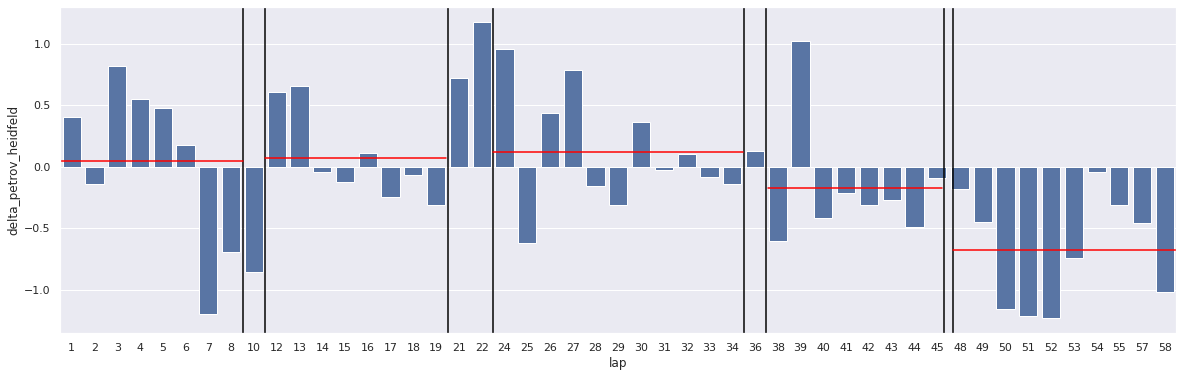

In [506]:
sns.barplot(x="lap", y="delta_petrov_heidfeld", data=delta_turkish,label="Total", color="b")
fig = mp.pyplot.gcf()

plt.axvline(7.5, 0, 1, c='black')
plt.axvline(8.5, 0, 1, c='black')

plt.axvline(16.5, 0, 1, c='black')
plt.axvline(18.5, 0, 1, c='black')

plt.axvline(29.5, 0, 1, c='black')
plt.axvline(30.5, 0, 1, c='black')

plt.axvline(38.3, 0, 1, c='black')
plt.axvline(38.7, 0, 1, c='black')

plt.axhline(ps0, 0, 0.164, c='red')
plt.axhline(ps1, 0.183, 0.346, c='red')
plt.axhline(ps2, 0.388, 0.612, c='red')
plt.axhline(ps3, 0.634, 0.79, c='red')
plt.axhline(ps4, 0.8, 1, c='red')

fig.set_size_inches(20,6)

Sur ce graphe, on remaque que les deltas n'ont pas de valeurs régulières entre elles. Ceci est du au événement de course et au différenciel entre les pneus neuf et usé entre les ravitaillements.
<br>
On remarque néanmoins que le Delta en fin de course a tourné à l'avantage de Petrov.

In [507]:
delta_turkish = timelap_turkish.query("delta_petrov_heidfeld > -2.5 and delta_petrov_heidfeld < 2.5 ")[["name","delta_petrov_heidfeld"]]

In [511]:
delta_turkish["delta_petrov_heidfeld"].mean()

-0.09671428571428581

## Algorithme EM

Cette partie reprend l'algorithme EM du site (C'est un gros copier coller):
https://dridk.me/expectation-maximisation.html

Le but étant de l'étudier pour ensuite savoir l'expliquer dans les slides de présentation

### Mélange Gaussien

<AxesSubplot:>

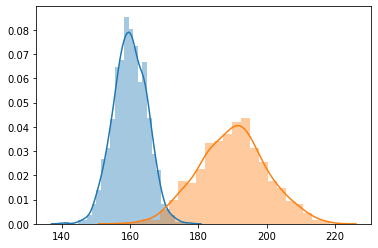

In [5]:
import numpy as np
import seaborn as sns

hommes = np.random.normal(190, 10, 1000)
# hommes = [171,171,173,180,190,159 ...]
femmes = np.random.normal(160,5, 1000)
# femmes = [145,170,145,161,139,150 ...]

sns.distplot(femmes, label="Femmes")
sns.distplot(hommes, label="Hommes")

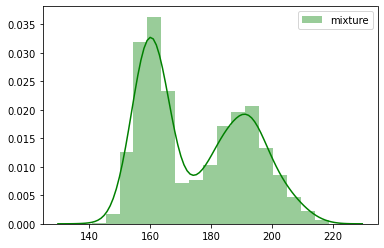

In [6]:
X  = np.concatenate((femmes,hommes))
sns.distplot(X, label="mixture", color="green")
plt.legend()

### Algorithme EM

KeyboardInterrupt: 

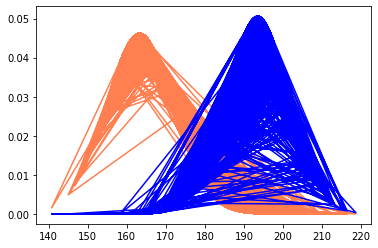

In [20]:
# Distribution des tailles X.. (voir plus haut )
# X      = [159,158, 159, 179, 189 ....]

# Générer un modèle aléatoire A 
A_mean = np.random.randint(100,300)
A_sd   = np.random.randint(10,30)

# Générer un modèle aléatoire B   
B_mean = np.random.randint(100,300)
B_sd   = np.random.randint(10,30)

# Faite 50 itérations... ( ca suffira)
for i in range(50):

    # Pour chaque valeur de X, calculer la probabilité 
    # sous l'hypothèse A et B
    p_A = scipy.stats.norm(loc=A_mean, scale=A_sd).pdf(X)
    p_B = scipy.stats.norm(loc=B_mean, scale=B_sd).pdf(X)

    
    # Calculer pour chaque valeur de X, un poids correspondant 
    # à son degrès d'appartenance à la loi A ou B.

    p_total  = p_A + p_B 
    weight_A = p_A / p_total
    weight_B = p_B / p_total

    # Exemple : Si la taille de 189cm appartient à la lois B 
    # alors weight_B(189) sera grand et weight_A(189) sera petit.

    #Ajustement des paramètres (μA,σA) et (μB,σB) en fonction du poids.

    A_mean = np.sum(X * weight_A )/ np.sum(weight_A)
    B_mean = np.sum(X * weight_B )/ np.sum(weight_B)

    A_sd   = np.sqrt(np.sum(weight_A * (X - A_mean)**2) / np.sum(weight_A))
    B_sd   = np.sqrt(np.sum(weight_B * (X - B_mean)**2) / np.sum(weight_B))
    plt.close()
    y = scipy.stats.norm.pdf(X,A_mean,A_sd)
    plt.plot(X,y, color='coral')
    y = scipy.stats.norm.pdf(X,B_mean,B_sd)
    plt.plot(X,y, color='blue')    

    # On recommence jusqu'à convergence. Non testé ici, je m'arrête à 50 iterations.